# Gradient Descent Implementation Challenge!!

## Use gradient descent to find the optimal parameters of a **multiple** regression model. (We only showed an implementation for a bivariate model during lecture.)

A note: Implementing gradient descent in any context is not trivial, particularly the step where we calculate the gradient will change based on the number of parameters that we're trying to optimize for. You will need to research what the gradient of a multiple regression model looks like. This challenge is pretty open-ended but I hope it will be thrilling. Please work together, help each other, share resources and generally expand your understanding of gradient descent as you try and achieve this implementation. 

## Suggestions:

Start off with a model that has just two $X$ variables You can use any datasets that have at least two x variables. Potential candidates might be the blood pressure dataset that we used during lecture on Monday: [HERE](https://college.cengage.com/mathematics/brase/understandable_statistics/7e/students/datasets/mlr/excel/mlr02.xls) or any of the housing datasets. You would just need to select from them the two varaibles $x$ variables and one y variable that you want to work with that you most want to work with. 

Use Sklearn to find the optimal parameters of your model first. (like we did during the lecture.) So that you can compare the parameter estimates of your gradient-descent linear regression to the estimates of OLS linear regression. If implemented correctly they should be nearly identical.

Becoming a Data Scientist is all about striking out into the unknown, getting stuck and then researching and fighting and learning until you get yourself unstuck. Work together! And fight to take your own learning-rate fueled step towards your own optimal understanding of gradient descent! 


In [158]:
!pip3 uninstall seaborn

Uninstalling seaborn-0.9.0:
  Would remove:
    /usr/local/lib/python3.6/dist-packages/seaborn-0.9.0.dist-info/*
    /usr/local/lib/python3.6/dist-packages/seaborn/*
Proceed (y/n)? n


In [159]:
!pip3 --no-cache-dir install seaborn

In [0]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, RobustScaler, StandardScaler 

# Spring Cleaning

In [0]:
df = pd.read_csv('https://raw.githubusercontent.com/ryanleeallred/datasets/master/Ames%20Housing%20Data/train.csv')
df = df.drop(['Id'], axis=1)
df = df.fillna(0)


def clean_cat(df):
  for col_name in df.columns:
      if(df[col_name].dtype == 'object'):
          df[col_name]= df[col_name].astype('category')
          df[col_name] = df[col_name].cat.codes
          


clean_cat(df)



# Kill The Outliers~

In [0]:
df = df[(np.abs(stats.zscore(df)) < 3).all(axis=1)]

# There's a bump on the log in the whole at the bottom of the sea!

In [0]:
df['log_price'] = np.log(df['SalePrice'])

In [0]:
df = df.astype('float64')

In [165]:
df.shape

(601, 81)

Filter the features you want, feel free to use them all
if you so desire, but please don't

In [0]:

df1 = df[['GrLivArea', 'OverallQual', 'TotalBsmtSF', 'GarageArea', 
               'GarageCars', 'OverallCond']]

df2 = df[['SalePrice']]

df_X = df1.values
df_y = df2.values

# Normalin! Normalin!

I want to compare gradient descent to my previous implementation of multivariate linear regression, given that the features selected were done so with a correlational matrix to log(sales price of home).

In [0]:
def normalize(features):
    '''
    features     -   (1460, 80)
    features.T   -   (80, 1460)

    We transpose the input matrix, swapping
    cols and rows to make vector math easier
    '''

    for feature in features.T:
        fmean = np.mean(feature)
        frange = np.amax(feature) - np.amin(feature)

        #Vector Subtraction
        feature -= fmean

        #Vector Division
        feature /= frange
    

    return features

In [0]:
df_X = normalize(df_X)

In [169]:
df_X.shape

(601, 6)

# Hypothesis
\begin{align}
h\theta(x) = \theta_{0} + \theta_{1}OverallQual +\theta_{2}GrLivArea +\theta_{3}TotalBsmtSF + \theta_{4}GarageArea + \theta_{5}GarageCars + \theta_{6}OverallCond
\end{align}

# Explanation of reduction to singular value by transposing theta and multiplying it by our feature matrix for multivariate linear regression

Given the hypothesis, $X_{0} = 1$

$X = \begin{bmatrix}X_{0} \\ X_{1} \\ X_{2} \\ X_{n}\end{bmatrix} \varepsilon\mathbb{R}$     $\theta = \begin{bmatrix}\theta_{0} \\ \theta_{1} \\ \theta_{2}\\ \theta_{n}\end{bmatrix} \varepsilon\mathbb{R}$


-----------------------------------------------------------------------------------------

$\theta^T = \begin{bmatrix} 
\theta_{0}& \theta_{1} &...\theta_{n}\\ 
\end{bmatrix}$


#Our $\theta^T$ values multiplied by our X or features 

$\theta_{0}X_{0} + \theta_{1}X_{1} + \theta_{n}X_{n} = \theta^TX$

# Gradient Descent given Multivariate

$h_\theta(x) = \theta^Tx$

#Calculating our cost function 
\begin{align}
MSE =  \frac{1}{2N} \sum_{i=1}^{n} (y_i - (W_1 x_1 + W_2 x_2 + W_3 x_3 + W_4 x_4 + W_5 x_5 + W_6 x_6))^2
\end{align}







---


*   Divide by 2 to make finding the derivative easier later. 




In [0]:
# init weights

w1, w2, w3, w4, w5, w6 = 1, 1, 1, 1, 1, 1

weights = np.array([[w1], 
                    [w2], 
                    [w3], 
                    [w4], 
                    [w5], 
                    [w6]])

def cost_function_MSE(features, target, weights):
    '''
    returns 1d matrix of predictions 
    '''
    
    N = len(target)
    
    predictions = predict(features, weights)
    squared_error = (predictions - target)**2
    
    return 1.0/(2*N) * sq_error.sum()

In [171]:
weights.shape

(6, 1)

In [0]:
weights = weights.astype('float64')

# Bad news bears...I literally spent 5 hours fighting with getting correct matrix shapes for everything for this to work. Was it worth it? we shall see....

Otherwise, this is a working multivariate gradient descent. What a freaking nightmare.

In [173]:
def predict(features, weights):
  
  return np.dot(features, weights)

temp_predictions = predict(df_X, weights)
temp_predictions[0:5]

array([[ 0.0885855 ],
       [ 0.23358375],
       [ 1.3295777 ],
       [ 0.80008104],
       [-0.98980439]])

# Finally defining gradient descent :) 



In [0]:
def gradient_descent(features, targets, weights, learning_rate):
  
  predictions = predict(features, weights)
  
  feature_length = len(features)
  
  #1. Time to predict!
  predictions = predict(features, weights)
  #2 - Calculate error/loss
  error = targets - predictions
  #3 Transpose features 
    # So we can multiply w the error matrix.
    # Returns a (6,1) matrix holding 6 partial derivatives --
    # one for each feature -- representing the aggregate
    # slope of the cost function across all observations
  gradient = np.dot(features.T,  error)
    
  #4 Take the average error derivative for each feature
  gradient /= feature_length
    
  #5 - Multiply the gradient by our learning rate
  gradient *= learning_rate
  
  #6 - Subtract from our weights to minimize cost
  weights -= gradient
  
  return weights
  

In [0]:
costs = []
costs2 = []
costs3 = []
costs4 = []
costs5 = []
costs6 = []

hue = [1, 2, 3, 4, 5, 6]

for i in range(500):
  mesa = gradient_descent(df_X, df_y, weights, .15)
  costs.append(mesa[0][0])
  costs2.append(mesa[1][0])
  costs3.append(mesa[2][0])
  costs4.append(mesa[3][0])
  costs5.append(mesa[4][0])
  costs6.append(mesa[5][0])

In [176]:
mesa

array([[-8.98677951e+08],
       [-1.13762267e+09],
       [-7.94460939e+08],
       [-1.29056108e+09],
       [-1.22335209e+09],
       [ 5.26326711e+08]])

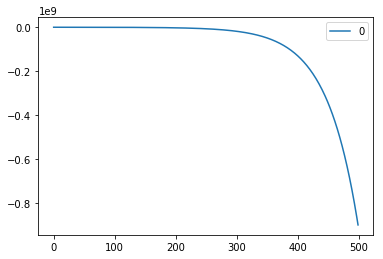

In [177]:
costs = pd.DataFrame(costs)
sns.lineplot(data=costs)

## Stretch Goals

If you happen upon the most useful resources for accomplishing this challenge first, I want you to spend time today studying other variations of Gradient Descent-Based Optimizers.

- Try and write a function that can perform gradient descent for arbitarily large (in dimensionality) multiple regression models. 
- Create a notebook for yourself exploring these topics
- How do they differ from the "vanilla" gradient descent we explored today
- How do these different gradient descent-based optimizers seek to overcome the challenge of finding the global minimum among various local minima?
- Write a blog post that reteaches what you have learned about these other gradient descent-based optimizers.

[Overview of GD-based optimizers](http://ruder.io/optimizing-gradient-descent/)

[Siraj Raval - Evolution of Gradient Descent-Based Optimizers](https://youtu.be/nhqo0u1a6fw)